# Temporal Clusters in the rainfall data
## Given the spatial distribution of rainfall over India is it possible tell when the data were observed?

### Step - 1: Prepare the data to feed spectral clustering

In [37]:
import numpy as np

# set random seed
np.random.seed(seed = 4200)

# import data
rain = np.load("../../data/rainfall/Rajeevan-1-degree-1901-2011-data-365-days.npy")

# pick a random year from the dataset
random_year = np.random.randint(111)
rain_ry = rain[random_year]
idx=np.where(rain_ry<0.01)
rain_ry[idx]=0.001


# create a function to compute running mean
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

# compute the weekly average
num_days = 3
n=rain_ry.shape[1] - num_days + 1
rain_ry_avg = np.zeros((rain_ry.shape[0],n ))
for loc in range(rain_ry.shape[0]):
    rain_ry_avg[loc] = running_mean(rain_ry[loc,:], num_days) 
#rain_ry_avg=np.log(rain_ry_avg)

In [71]:
import matplotlib.pylab as plt

from sklearn.preprocessing import StandardScaler
# scale the data in a standard way
scaler = StandardScaler()
scaler.fit(rain_ry_avg.T)
scaled_rain=scaler.transform(rain_ry_avg.T)
#plt.plot(scaled_rain,'.')

### Step - 2: Apply K-means clustering for (k = 2, 3, ..., 12)

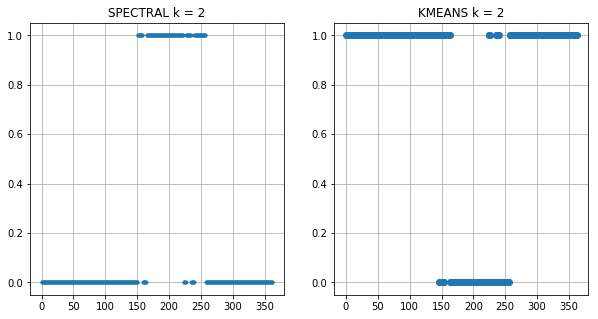

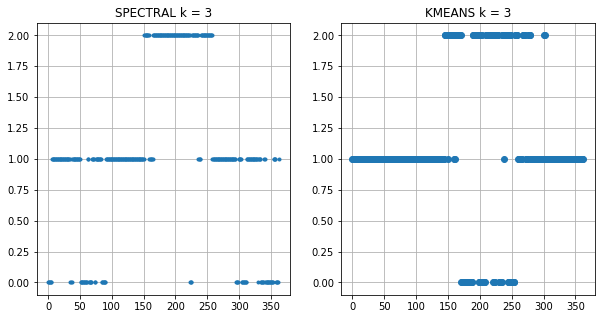

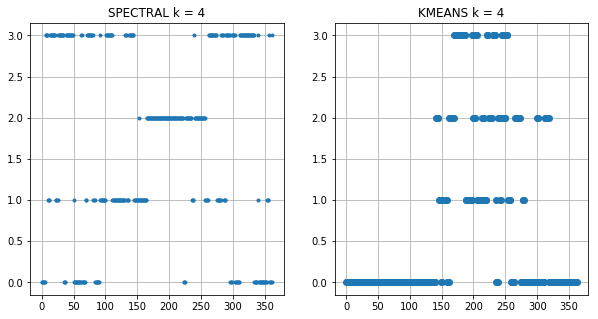

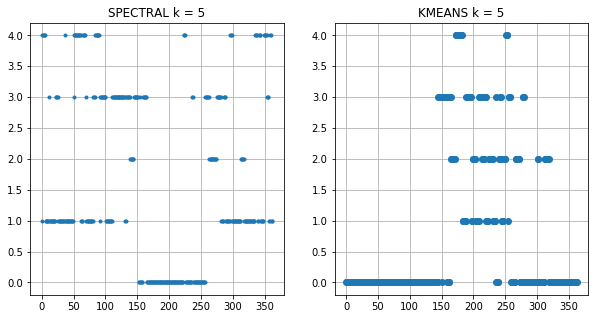

In [72]:
from sklearn.cluster import SpectralClustering, DBSCAN, KMeans
from scipy.spatial.distance import cdist 
clusters = []
clusters1 = []
distortions=[]
inertias=[]
kmax=5
#clusters = DBSCAN(eps = 10, min_samples = 20).fit(scaled_rain)
for k in range(2,kmax+1):
    clusters.append(SpectralClustering(n_clusters = k,random_state=0,n_init=3,affinity='nearest_neighbors').fit(scaled_rain))
    clusters1.append(KMeans(n_clusters=k,init='k-means++',max_iter=1000,n_init=3,random_state=0).fit(scaled_rain))
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.plot(clusters[k-2].labels_,'.')
    plt.title('SPECTRAL k = '+ str(k))
    plt.grid()
    plt.subplot(122)
    plt.plot(clusters1[k-2].labels_,'o')
    plt.grid()
    plt.title('KMEANS k = '+ str(k))
    
    distortions.append(sum(np.min(cdist(scaled_rain, clusters1[k-2].cluster_centers_, 
                      'euclidean'),axis=1)) / scaled_rain.shape[0]) 
    inertias.append(clusters1[k-2].inertia_) 

## Step - 3: Use elbow method to find the optimal number of clusters
 doesn't help in this case, went upto k=30


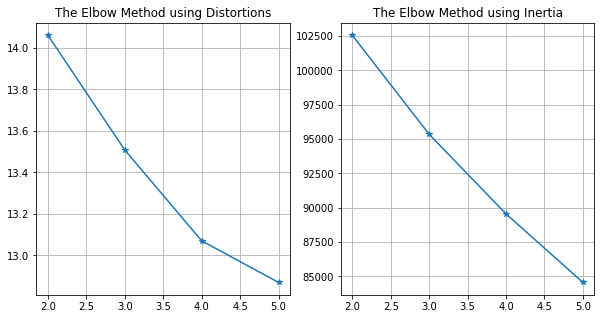

In [73]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(np.arange(2,kmax+1,1),distortions,'*-')
plt.title('The Elbow Method using Distortions') 
plt.grid()
plt.subplot(122)
plt.plot(np.arange(2,kmax+1,1),inertias,'*-')
plt.title('The Elbow Method using Inertia') 
plt.grid()

### Step - 4: Can we tell if a certain day belonged to the monsoon period?